In [1]:
# question: which variables correlate with gross revenue?

In [2]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

from datetime import datetime
import re

In [3]:
# read in data

df = pd.read_csv(r'...\movies.csv')

In [4]:
# look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
# see number of rows and columns in the dataframe

df.shape

(7668, 15)

In [6]:
# clean the data 

In [7]:
# see if there is any missing data

df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [8]:
# delete rows with missing values

df = df.dropna()

In [9]:
# check if it worked

df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [10]:
# see number of rows and columns after dropping rows that contain any empty values

df.shape

(5421, 15)

In [11]:
# check data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [12]:
# convert 'score', 'votes', 'budget', 'gross' and 'runtime' to integers 

In [13]:
df['score'] = df['score'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [14]:
df.dtypes

name        object
rating      object
genre       object
year         int64
released    object
score        int64
votes        int64
director    object
writer      object
star        object
country     object
budget       int64
gross        int64
company     object
runtime      int64
dtype: object

In [15]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [16]:
# there are 2 variables for date of release: 'year' and 'released'
# extract the year from the 'released' and overwrite the existing 'year' with it

df['year'] = df['released'].str.extract(r'\w+ \d+, (\d+)') 

# convert new 'year' variable into an integer

df = df.dropna()
df['year'] = df['year'].astype('int64')

In [17]:
# 'released' column now became redundant. delete it. 

df = df.drop('released', axis=1)

In [18]:
df.shape

(5407, 14)

In [19]:
df.dtypes

name        object
rating      object
genre       object
year         int64
score        int64
votes        int64
director    object
writer      object
star        object
country     object
budget       int64
gross        int64
company     object
runtime      int64
dtype: object

In [20]:
# drop any duplicates

df = df.drop_duplicates()

In [21]:
df.shape

(5407, 14)

In [22]:
# there were no duplicates

In [23]:
# find correlations

In [24]:
# i assume these variables will have high correlation with gross revenue: score and budget 

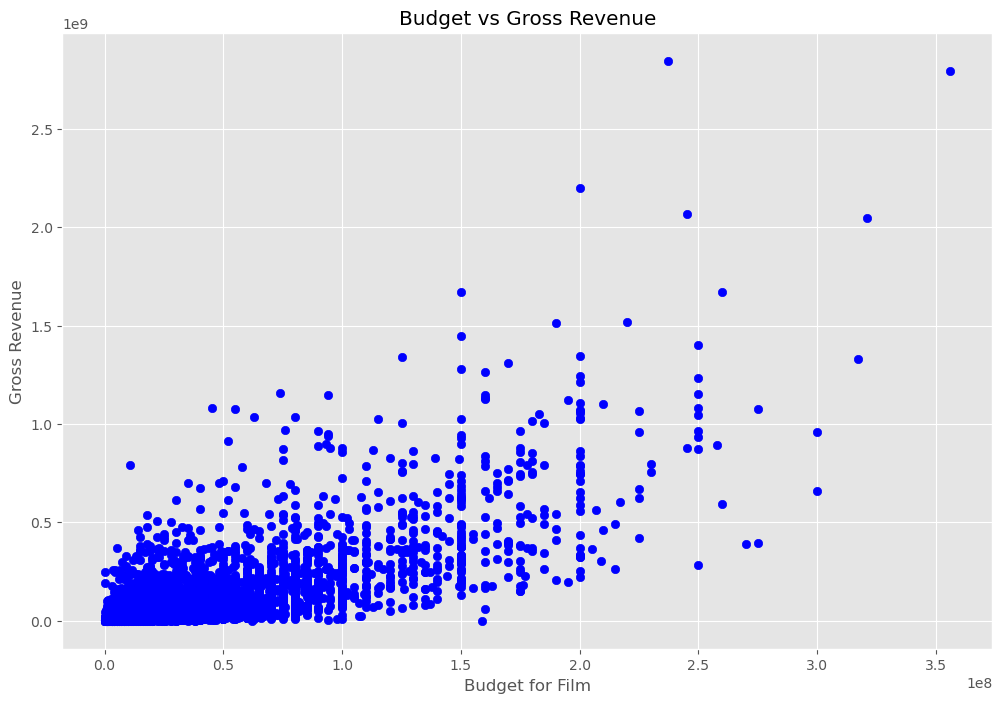

In [25]:
# scatter plot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'], color='blue')
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Revenue')
plt.show()

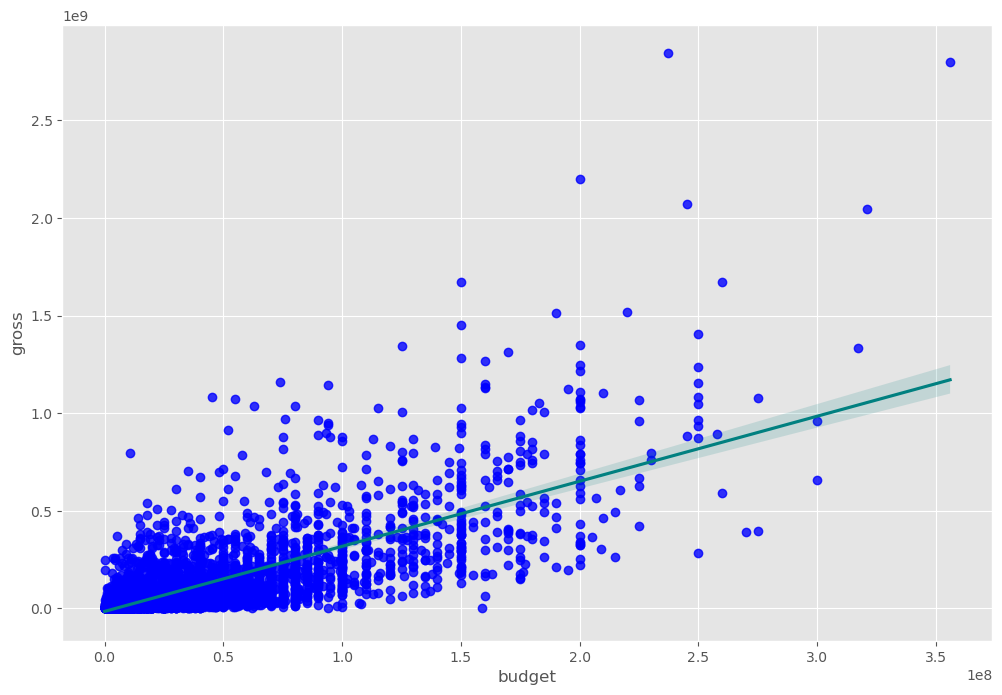

In [26]:
# fit a line onto the scatter plot

sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"blue"},line_kws={"color":"teal"})
plt.show()

In [27]:
# check correlations
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.061968,0.202215,0.319669,0.268141,0.075183
score,0.061968,1.000000,0.456141,0.065954,0.211907,0.395050
votes,0.202215,0.456141,1.000000,0.439077,0.614432,0.352263
budget,0.319669,0.065954,0.439077,1.000000,0.740028,0.318353
gross,0.268141,0.211907,0.614432,0.740028,1.000000,0.275641
runtime,0.075183,0.395050,0.352263,0.318353,0.275641,1.000000


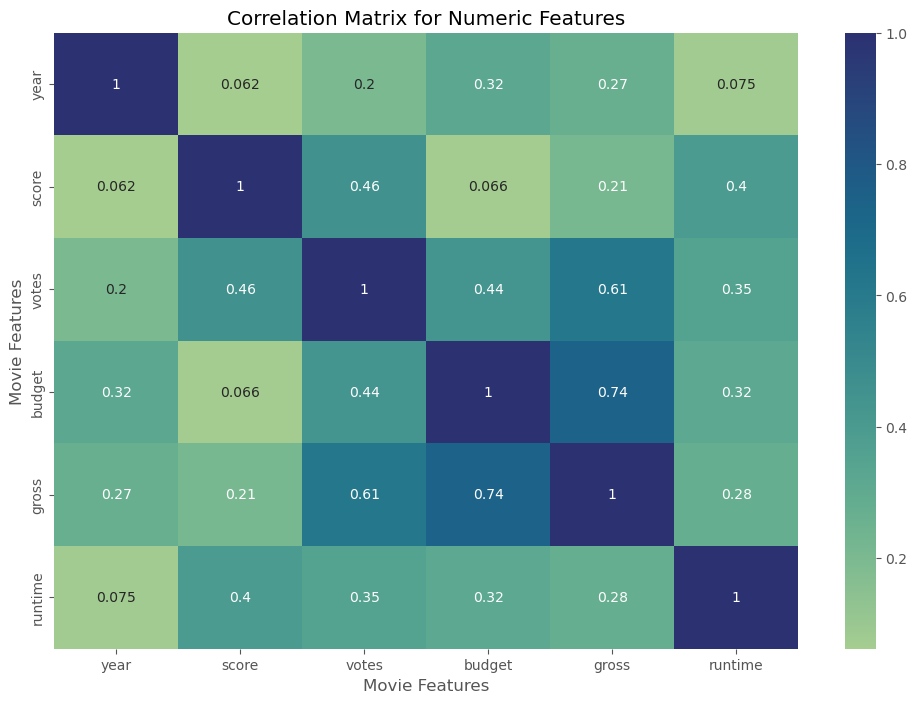

In [28]:
# correlation matrix 

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix,cmap='crest',annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

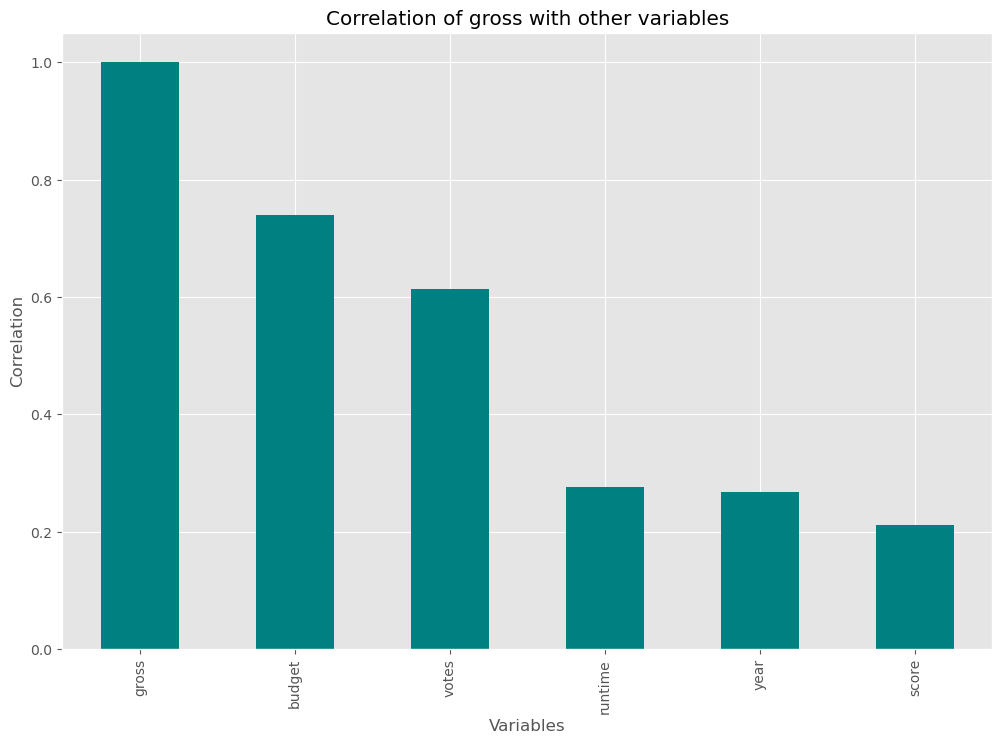

In [29]:
# Select the row of interest and plot it as a bar plot

row_to_plot = 'gross'
corr_values = correlation_matrix.loc[row_to_plot]
corr_values_sorted = corr_values.sort_values(ascending=False)
corr_values_sorted.plot(kind='bar', color='teal')
plt.title(f'Correlation of {row_to_plot} with other variables')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.show()

In [30]:
# the gross revenue only has a strong correlation with 'budget': 0.74
# it is moderately correlated with 'votes': 0.61
# with the rest of the variables, it has a weak correlation: < 0.3

# i find it interesting that a movie's gross revenue's correlation is so low with it's IMDB score. i was expecting it to be high.
# votes, which is the number of votes submitted on IMDB seems to be a lot more relevant. this makes sense, since a higher number of votes shows that more people were interested in seeing the movie which contributes to its revenues.